In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
from sklearn.datasets import load_diabetes

from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm, metrics


In [126]:
keep_health = load_diabetes()

In [127]:
keep_health.target.shape

(442,)

In [128]:
X = keep_health.data
y = keep_health.target

In [130]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled



array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41855058, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43655059, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06020733, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98558469,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93615545, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08871747,  0.06442552]])

In [131]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 1 )

### Applying SVR to the dataset

In [134]:
#Those who are in Machine Learning or Data Science are quite familiar with the term SVM or Support Vector Machine. But SVR is a bit different from SVM. As the name suggest the SVR is an regression algorithm , so we can use SVR for working with continuous Values instead of Classification which is SVM.


#X = [[0, 0], [2, 2]]
#y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)
y_nu = regr.predict(X)
y_nu


array([154.5531456 , 113.21775309, 146.27274018, 144.16013091,
       127.32161948, 127.58114822, 113.57752317, 142.59808544,
       143.88472572, 150.42258654, 131.44245721, 136.97027959,
       116.0956868 , 142.30709687, 118.39950823, 149.77317991,
       149.27846365, 157.87403052, 133.00084272, 118.8966883 ,
       124.08725923, 118.96148191, 124.24453057, 158.83731036,
       136.82047338, 137.49134683, 128.96303508, 139.96466642,
       129.09664955, 145.52308488, 133.14812814, 114.42896607,
       155.8983734 , 124.91476497, 118.30881823, 128.0882515 ,
       149.36151011, 130.48619725, 162.71674747, 134.189576  ,
       152.19675021, 128.11242153, 133.91735304, 125.2921671 ,
       160.26849179, 129.73634512, 129.14521405, 131.42086741,
       119.17768714, 151.21347129, 135.56883276, 144.89804421,
       131.27855754, 142.31990695, 128.9775181 , 111.88859622,
       150.56524551, 123.42758846, 131.69696684, 142.54603867,
       123.54298151, 145.73354088, 111.43909419, 127.17

### Trying Cross Validation

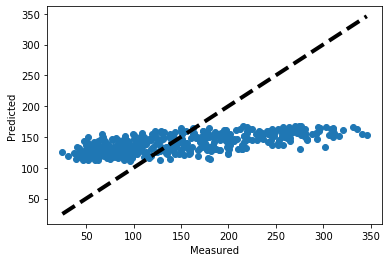

In [135]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(regr, X, y_nu, cv = 10 )


fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Extra : Developing a Pipeline

In [137]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [138]:
# to convert bunch file to Pandas DataFrame
# df = pd.DataFrame(keep_health.data, columns= keep_health.feature_names)
# df.head()

# health = pd.DataFrame(data= np.c_[keep_health['data'], keep_health['target']],
#                      columns= keep_health['feature_names'] + ['target'])

# health.head()